In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [2]:
# Create SQLAlchemy engine to connect to database
engine = create_engine('sqlite:///austinHousingData.sqlite')

In [3]:
# INSPECT to confirm existence
# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# Print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # Retrieve columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

austin_housing
-----------
zpid BIGINT
city TEXT
streetAddress TEXT
zipcode BIGINT
description TEXT
latitude FLOAT
longitude FLOAT
propertyTaxRate FLOAT
garageSpaces BIGINT
hasAssociation BOOLEAN
hasCooling BOOLEAN
hasGarage BOOLEAN
hasHeating BOOLEAN
hasSpa BOOLEAN
hasView BOOLEAN
homeType TEXT
parkingSpaces BIGINT
yearBuilt BIGINT
latestPrice FLOAT
numPriceChanges BIGINT
latest_saledate TEXT
latest_salemonth BIGINT
latest_saleyear BIGINT
latestPriceSource TEXT
numOfPhotos BIGINT
numOfAccessibilityFeatures BIGINT
numOfAppliances BIGINT
numOfParkingFeatures BIGINT
numOfPatioAndPorchFeatures BIGINT
numOfSecurityFeatures BIGINT
numOfWaterfrontFeatures BIGINT
numOfWindowFeatures BIGINT
numOfCommunityFeatures BIGINT
lotSizeSqFt FLOAT
livingAreaSqFt FLOAT
numOfPrimarySchools BIGINT
numOfElementarySchools BIGINT
numOfMiddleSchools BIGINT
numOfHighSchools BIGINT
avgSchoolDistance FLOAT
avgSchoolRating FLOAT
avgSchoolSize BIGINT
MedianStudentsPerTeacher BIGINT
numOfBathrooms FLOAT
numOfBedroom

In [4]:
# Prepare queries to be used in Flask
# How many homes have Homeowner Association per Year Built?

# Build the query
query = f"""
        SELECT city, yearBuilt, homeType, COUNT(*)
        FROM austin_housing
        WHERE hasAssociation = 1 AND yearBuilt > 1980 
        GROUP BY city, yearBuilt
"""

# Execute the query
hoa_df = pd.read_sql(text(query), con=engine)
hoa_df.head(100)

,city,yearBuilt,homeType,COUNT(*)
0,austin,1981,Single Family,56
1,austin,1982,Single Family,80
2,austin,1983,Single Family,119
3,austin,1984,Single Family,130
4,austin,1985,Single Family,111
...,...,...,...,...
78,pflugerville,2017,Single Family,8
79,pflugerville,2018,Single Family,1
80,pflugerville,2019,Single Family,3
81,pflugerville,2020,Single Family,2


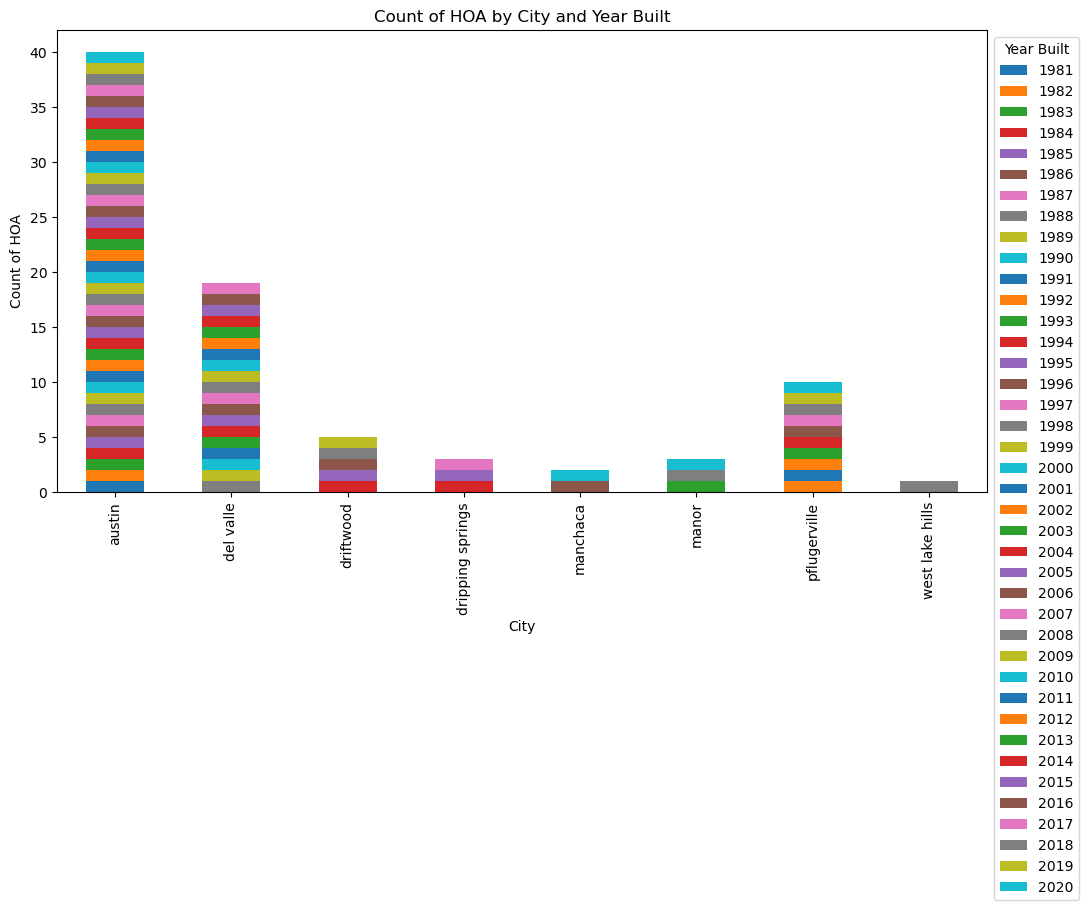

In [5]:
# Prepare visuals to be used in Flask
# Group data from the SQL query
city_year_counts = hoa_df.groupby(['city', 'yearBuilt']).size().unstack() # reshapes the data to make it suitable for plotting

# Plotting the data
city_year_counts.plot(kind='bar', stacked=True, figsize=(12, 6)) # creates a stacked bar plot
plt.xlabel('City')
plt.ylabel('Count of HOA')
plt.title('Count of HOA by City and Year Built')
plt.legend(title='Year Built', bbox_to_anchor=(1, 1))
plt.show()


In [6]:
# Close the engine
engine.dispose()